# Diabetes Prediction
Dataset: [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database/)


In [1]:
# !pip install -q matplotlib-venn

In [2]:
# !apt-get -qq install -y libfluidsynth1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Since some columns contain value as zero which do not make any sense given the column name, we assume 0 was inserted in the dataset to denote missing values. So, replacing `0` with `np.nan`

In [6]:
df['Glucose'].replace(0,np.nan,inplace=True)
df['BloodPressure'].replace(0,np.nan,inplace=True)
df['SkinThickness'].replace(0,np.nan,inplace=True)
df['Insulin'].replace(0,np.nan,inplace=True)
df['BMI'].replace(0,np.nan,inplace=True)

In [7]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Replacing NaN values in dataset with respective medians, after trial and error to increase accuracy.

In [8]:
df['Glucose'].fillna(df['Glucose'].median(),inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)

Splitting data into train and test sets.

In [9]:
from sklearn.model_selection import train_test_split
X = np.matrix(df.drop('Outcome',axis=1))
Y = np.array(df['Outcome'])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

## 4.1. Using Logistic Regression

### Using sklearn

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logr = LogisticRegression(solver='lbfgs', max_iter=1000)

In [12]:
logr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
logr.score(x_test, y_test)

0.7916666666666666

`The accuracy of 79.167% is achieved with Logistic Regression Algorithm`

## 4.2. Using kNN

### Using sklearn

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
scores = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    scores.append(knn.score(x_test, y_test))

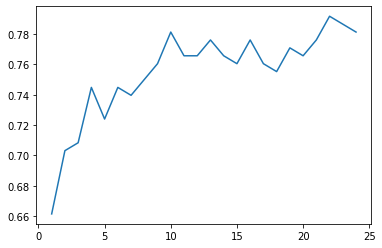

In [16]:
sns.lineplot(range(1,25),scores)

In [17]:
print(scores)
print("max score entry:", max(enumerate(scores),key=lambda x:x[1]))

[0.6614583333333334, 0.703125, 0.7083333333333334, 0.7447916666666666, 0.7239583333333334, 0.7447916666666666, 0.7395833333333334, 0.75, 0.7604166666666666, 0.78125, 0.765625, 0.765625, 0.7760416666666666, 0.765625, 0.7604166666666666, 0.7760416666666666, 0.7604166666666666, 0.7552083333333334, 0.7708333333333334, 0.765625, 0.7760416666666666, 0.7916666666666666, 0.7864583333333334, 0.78125]
max score entry: (21, 0.7916666666666666)


`The accuracy of 79.167% is achieved when K=22 with k-Nearest Neighbors Algorithm`